<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/Experimentos%20Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import numpy as np

Como ejemplo, vamos a analizar datos de una evaluación de impacto experimental (un Randomized Control Trial, RCT) llevada a cabo en Marruecos, donde se buscó estimar el impacto de la conexión a la red de agua.

Extracto de datos de:

[Devoto, F., Duflo, E., Dupas, P., Parienté, W., & Pons, V. (2012). Happiness on tap: piped water adoption in urban Morocco. American Economic Journal: Economic Policy, 4(4), 68-99.](https://web.stanford.edu/~pdupas/MoroccoWaterConnections.pdf
)

Las variables fueron modificadas para el proposito de este ejercicio.

**Descripción de variables**


motivacion: Dummy = 1 si el hogar recibió motivación para conexión \
conectado: Dummy = 1 si el hogar se conectó a la red de agua \
sexojefe: Dummy = 1 Masculino, 0 Femenino \
edadjefe: Edad Jefe de Hogar \
jefesabeleer: Dummy=1 Jefe sabe leer \
jefesabeescribir: Dummy=1 Jefe sabe escribir \
pdiasfueaescuela: Porcentaje dias hijos fueron a la escuela.




In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/rpasquini/econometrics_and_causality/master/happiness_on_tap_extract.csv')

In [ ]:
df.head()

,random_id,motivacion,conectado,sexojefe,edadjefe,jefesabeleer,jefesabeescribir,pdiasfueaescuela
0,1,0,0,1,37.0,1.0,1.0,NaN
1,3,1,1,1,45.0,0.0,0.0,57.142860
2,5,0,0,1,50.0,1.0,1.0,85.714287
3,7,1,1,1,54.0,1.0,1.0,85.714287
4,8,0,0,2,66.0,0.0,0.0,NaN


In [ ]:
df.head()

,random_id,motivacion,conectado,sexojefe,edadjefe,jefesabeleer,jefesabeescribir,pdiasfueaescuela
0,1,0,0,1,37.0,1.0,1.0,NaN
1,3,1,1,1,45.0,0.0,0.0,57.142860
2,5,0,0,1,50.0,1.0,1.0,85.714287
3,7,1,1,1,54.0,1.0,1.0,85.714287
4,8,0,0,2,66.0,0.0,0.0,NaN


El experimento de Devoto et. al. asignó aleatoriamente una "motivación" a conectarse. Notando que la motivación fue efectiva para inducir la conexión, nos enfocaremos aquí en el intention-to-treat effect.

Nuestro propósito es estimar el efecto promedio de los que fueron motivados.  
Como hubo una asignación experimental, entonces sabemos que podemos recuperar el efecto causal comparando los sorteados para recibir la motivación contra los que no fueron elegidos. (Nota: Más adelante en el curso, cuando cubramos variables instrumentales, veremos que es posible recuperar el efecto de tratamiento propiamente dicho.)

Vamos a implementar la estimación de dos formas:
1. Un test de diferencias de medias
2. La estimación de un modelo de regresión



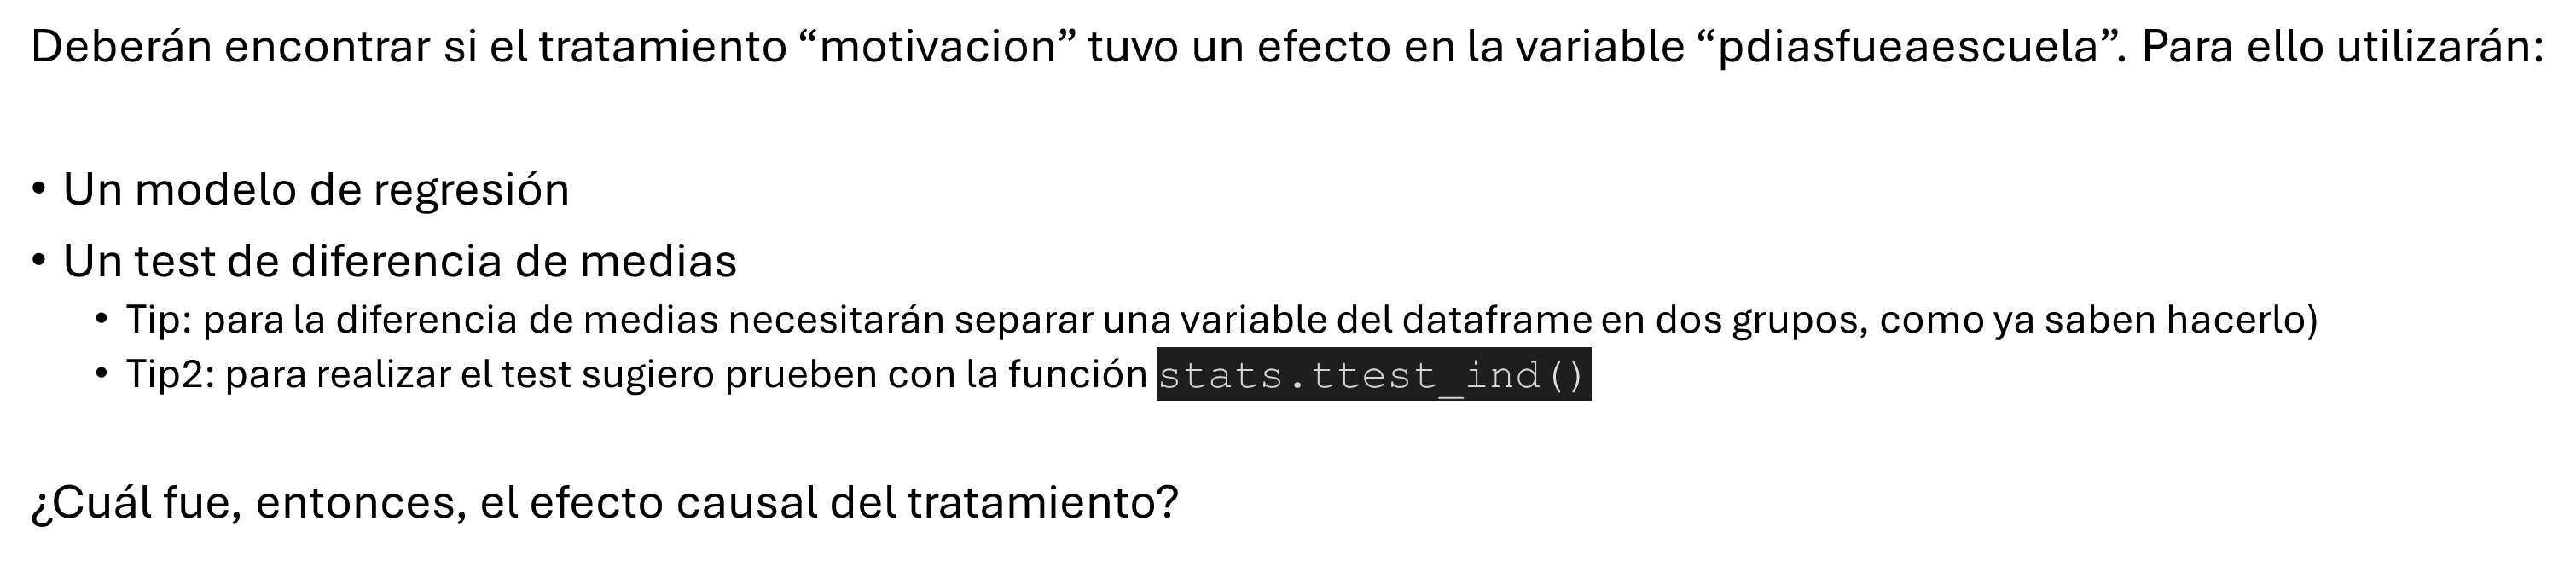